### Import libraries and cleaned data

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("/content/drive/MyDrive/iron_hack/week_9/clean/cleaned_hotel_reviews.csv")
data.head(50)

,hotel_name,user_review,reviewer_nationality,tags,average_score,reviewer_score,length
0,Hotel Arena,I am so angry that i made this post available...,Russia,"[' Leisure trip ', ' Couple ', ' Duplex Double...",8,3,404
1,Hotel Arena,No Negative No real complaints the hotel was g...,Ireland,"[' Leisure trip ', ' Couple ', ' Duplex Double...",8,8,105
2,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Australia,"[' Leisure trip ', ' Family with young childre...",8,7,59
3,Hotel Arena,My room was dirty and I was afraid to walk ba...,United Kingdom,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",8,4,232
4,Hotel Arena,You When I booked with your company on line y...,New Zealand,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",8,7,144
5,Hotel Arena,Backyard of the hotel is total mess shouldn t...,Poland,"[' Leisure trip ', ' Group ', ' Duplex Double ...",8,7,33
6,Hotel Arena,Cleaner did not change our sheet and duvet ev...,United Kingdom,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",8,5,47
7,Hotel Arena,Apart from the price for the brekfast Everyth...,United Kingdom,"[' Leisure trip ', ' Couple ', ' Duplex Double...",8,10,27
8,Hotel Arena,Even though the pictures show very clean room...,Belgium,"[' Leisure trip ', ' Couple ', ' Duplex Double...",8,6,34
9,Hotel Arena,The aircondition makes so much noise and its ...,Norway,"[' Leisure trip ', ' Couple ', ' Large King Ro...",8,8,61


Let's create first our "corpus" or database of "possible words" in the positive reviews. This is an specific set of common words in the reviews of the hotels

In [6]:
data['user_review']

0          I am so angry that i made this post available...
1         No Negative No real complaints the hotel was g...
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
                                ...                        
257424    No Negative Good breakfast Shooping center wit...
257425    No Negative Second to none location if you re ...
257426     Wifi Location No tea or coffee in the room Ra...
257427    No Negative The breakfast was excelent lots of...
257428    No Negative The rooms are enormous and really ...
Name: user_review, Length: 257429, dtype: object

In [7]:
reviews = ''

for review in data['user_review'].loc[:10000]:
    reviews += review

corpus = nltk.sent_tokenize(reviews) #it looks liek he array of strings#because it removes some special characthers


### Text cleaning

We would like to clean the text by means of:

* use lowercase
* drop punctuation marks

In [8]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    #use regex for TEXT CLEANING
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ''
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'lxml').get_text().strip()

Corpus after text cleaning

In [9]:
corpus

['i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for   nights in this hotel from   to   july upon arrival we were placed in a small room on the  nd floor of the hotel it turned out that this was not the room we booked i had specially reserved the   level duplex room so that we would have a big windows and high ceilings the room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it i intimately asked to change the room and after explaining   times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day so i had to check out the next day before   o clock in order to get the room i waned to not the best way to begin your

### Tokenizing the corpus

[link text](https:// [link text](https://))Now, what we want is to get how many times a word appears in the reviews: we want to count words. For that, we are going to use a dictionary in which the keys will be the words, and the values the corresponding frequencies of them

In [10]:
wordfreq = {} # A dictionary to hold as keys every single word, and the value is how many times appears the word.
for sentence in corpus:
    words = sentence.split() # List of words in a given review.
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ):
            wordfreq[word] = 1 # We initialize the corresponding counter
        else:
            wordfreq[word] += 1 # We increase the corresponding counter
    

Let's get how many words we have in our corpus.

In [11]:
len(list(wordfreq.keys()))

13161

This amount is insanely big to create a dataframe. Clearly, we need to reduce this. Let's pick only the most frequent words

### Reducing the corpus

There are two approaches for this:

* drop "stopwords" (articles, prepositions,...etc)
* use TF-IDF

Method1: Stop words Approach

All the languages have some words which doesn't carry meaning, they are just to concatenate words. Those are typically articles, prepositions,...etc and therefore are useless for our pourposses. Then we would like to drop them. Fortunatelly the nltk library comes with a set of **stop words** for several languages although it's not perfect and you may want to tweek it a bit.

In [12]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english')) 
len(stop_words)

179

Cleaning the stopwords

In [13]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

Now let's drop the stop words and get how many times appear every non stopword in the whole dataset.

In [14]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words] #how many times the words appear s

In [15]:
corpus

[(10, 'angry'),
 (755, 'made'),
 (12, 'post'),
 (301, 'available'),
 (78, 'via'),
 (87, 'possible'),
 (37, 'sites'),
 (483, 'use'),
 (1, 'planing'),
 (18, 'trips'),
 (1416, 'one'),
 (357, 'make'),
 (36, 'mistake'),
 (531, 'booking'),
 (399, 'place'),
 (180, 'com'),
 (616, 'stayed'),
 (221, 'nights'),
 (6099, 'hotel'),
 (9, 'july'),
 (139, 'upon'),
 (348, 'arrival'),
 (51, 'placed'),
 (2199, 'small'),
 (10407, 'room'),
 (44, 'nd'),
 (840, 'floor'),
 (92, 'turned'),
 (627, 'booked'),
 (32, 'specially'),
 (32, 'reserved'),
 (116, 'level'),
 (7, 'duplex'),
 (1836, 'would'),
 (513, 'big'),
 (312, 'windows'),
 (309, 'high'),
 (23, 'ceilings'),
 (180, 'ok'),
 (45, 'mind'),
 (129, 'broken'),
 (383, 'window'),
 (141, 'closed'),
 (9, 'hello'),
 (28, 'rain'),
 (187, 'mini'),
 (185, 'fridge'),
 (5, 'contained'),
 (51, 'sort'),
 (1, 'bio'),
 (1, 'weapon'),
 (99, 'least'),
 (1, 'guessed'),
 (124, 'smell'),
 (1, 'intimately'),
 (500, 'asked'),
 (179, 'change'),
 (12, 'explaining'),
 (302, 'times'),
 

Let's sort the words by frequency and get the 20 most frequent words. We will use these "most frequent" words as the columns of our dataframe.
This value of 20 has to be chosen looking for a compromise between having a good accuracy and not too many columns in the dataset. Probably you would like to increase this value. However, for ilustrative purposes we're going to use this value.

Clearly the first word of the corpus doesn't make sense; we need to drop it.

In [16]:
corpus.sort(reverse = True)

# Here we keep only the 25 most frequent words but it can be changed to another bigger value
corpus_freq = [(word[1],word[0]) for word in corpus[:25]] 
corpus_freq = corpus_freq[1:] # The first word was not relevant
corpus_freq

[('hotel', 6099),
 ('staff', 5996),
 ('location', 3969),
 ('breakfast', 3421),
 ('good', 3057),
 ('great', 2714),
 ('bed', 2382),
 ('small', 2199),
 ('friendly', 2153),
 ('rooms', 2031),
 ('helpful', 2001),
 ('nice', 1867),
 ('would', 1836),
 ('comfortable', 1731),
 ('clean', 1731),
 ('stay', 1669),
 ('us', 1553),
 ('bathroom', 1525),
 ('excellent', 1482),
 ('could', 1448),
 ('bar', 1435),
 ('negative', 1433),
 ('one', 1416),
 ('really', 1364)]

### Stemming

Let's use only the root of every word

> loved, love and lovers have the same root: love

we only want the "root" of each word.

Let's construct a list of tuples in which each tuple will contain the word and how many times appears the "root" of the word.



In [17]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')

lem = WordNetLemmatizer()

corpus_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_freq]


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [18]:
corpus_freq

[('hotel', 6099),
 ('staff', 5996),
 ('location', 3969),
 ('breakfast', 3421),
 ('good', 3057),
 ('great', 2714),
 ('bed', 2382),
 ('small', 2199),
 ('friendly', 2153),
 ('room', 2031),
 ('helpful', 2001),
 ('nice', 1867),
 ('would', 1836),
 ('comfortable', 1731),
 ('clean', 1731),
 ('stay', 1669),
 ('u', 1553),
 ('bathroom', 1525),
 ('excellent', 1482),
 ('could', 1448),
 ('bar', 1435),
 ('negative', 1433),
 ('one', 1416),
 ('really', 1364)]

## Creating a dataframe 

Now we want to have a dataframe in which each column will correspond to each of the twenty most frequent words in the dataset while each record will contain how many times appears the corresponding word in the dataset. We can expand the number of columns considering more words, but in this case we will restrict ourselfs to this amount for instructive purposes.

In [19]:
cols = {word[0]: [] for word in corpus_freq}
reviews = pd.DataFrame(cols)

reviews

,hotel,staff,location,breakfast,good,great,bed,small,friendly,room,...,clean,stay,u,bathroom,excellent,could,bar,negative,one,really


In [20]:
list(cols.keys())

['hotel',
 'staff',
 'location',
 'breakfast',
 'good',
 'great',
 'bed',
 'small',
 'friendly',
 'room',
 'helpful',
 'nice',
 'would',
 'comfortable',
 'clean',
 'stay',
 'u',
 'bathroom',
 'excellent',
 'could',
 'bar',
 'negative',
 'one',
 'really']

Time to fill out the dataframe. This is a time consuming process, it takes certain minutes...

In [21]:
def review_inpector(sentence, stop_words, words):
    '''
    Function that takes a review and returns a dictionary of word frequencies
    Inputs:
    sentence -> review: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the review in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding review
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the review
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

my_list = list( map(review_inpector, data['user_review'], 
                    [stop_words]*data.shape[0], [list(cols.keys())]*data.shape[0] ) )

my_list[:2]


[{'hotel': 4,
  'staff': 0,
  'location': 0,
  'breakfast': 0,
  'good': 0,
  'great': 0,
  'bed': 0,
  'small': 1,
  'friendly': 0,
  'room': 13,
  'helpful': 0,
  'nice': 0,
  'would': 1,
  'comfortable': 0,
  'clean': 0,
  'stay': 0,
  'u': 0,
  'bathroom': 0,
  'excellent': 0,
  'could': 0,
  'bar': 0,
  'negative': 0,
  'one': 2,
  'really': 0},
 {'hotel': 1,
  'staff': 2,
  'location': 1,
  'breakfast': 0,
  'good': 0,
  'great': 3,
  'bed': 0,
  'small': 0,
  'friendly': 0,
  'room': 1,
  'helpful': 0,
  'nice': 0,
  'would': 1,
  'comfortable': 0,
  'clean': 0,
  'stay': 0,
  'u': 0,
  'bathroom': 0,
  'excellent': 1,
  'could': 0,
  'bar': 0,
  'negative': 1,
  'one': 1,
  'really': 0}]

In [22]:
reviews = pd.DataFrame(my_list)

In [23]:
reviews.head()

,hotel,staff,location,breakfast,good,great,bed,small,friendly,room,...,clean,stay,u,bathroom,excellent,could,bar,negative,one,really
0,4,0,0,0,0,0,0,1,0,13,...,0,0,0,0,0,0,0,0,2,0
1,1,2,1,0,0,3,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
2,1,1,1,1,1,0,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
3,2,1,1,0,0,1,2,0,0,4,...,1,0,0,0,0,1,1,0,0,0
4,0,1,1,0,0,0,0,0,0,3,...,0,0,0,0,0,1,0,0,0,1


In [24]:
reviews.shape

(257429, 24)

## Merging data frames

In [28]:
reviews['reviewer_score'] = data['reviewer_score']

In [29]:
data[['reviewer_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257429 entries, 0 to 257428
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  257429 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


Let's inspect the number of star rating

In [30]:
reviews['reviewer_score'].value_counts()

10    83091
8     54598
9     52863
7     24517
6     17009
5     15191
4      6120
3      2798
2      1242
Name: reviewer_score, dtype: int64

In [31]:
reviews['reviewer_score'].unique()

array([ 3,  8,  7,  4,  5, 10,  6,  9,  2])

In [32]:
reviews['reviewer_score'] = reviews['reviewer_score'].astype(str)

In [33]:
reviews['reviewer_score'].value_counts()

10    83091
8     54598
9     52863
7     24517
6     17009
5     15191
4      6120
3      2798
2      1242
Name: reviewer_score, dtype: int64



## Splitting

In [41]:
X = reviews.drop(columns='reviewer_score')
y = reviews['reviewer_score']

In [42]:
def train_and_test_split(X, y, test_size=0.2, random_state=42):
    
    # Split X,y into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=random_state)
    print(f'X_train: {X_train.shape}')
    print(f'X_test:  {X_test.shape}')
    print(f'y_train: {y_train.shape}')
    print(f'y_test:  {y_test.shape}')

    return X_train, X_test, y_train, y_test


In [43]:
X_train, X_test, y_train, y_test = train_and_test_split(X, y, test_size=0.30, random_state=42)

X_train: (180200, 24)
X_test:  (77229, 24)
y_train: (180200,)
y_test:  (77229,)


analysing the split data

## Class balancing

In [55]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns= X_train.columns)
y_train_res = pd.DataFrame(y_train_res, columns =['reviewer_score'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


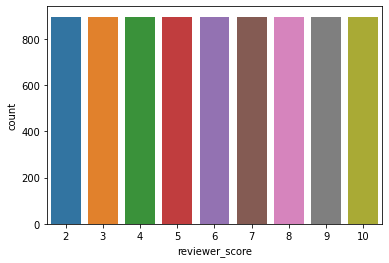

In [56]:
sns.countplot(y_train_res['reviewer_score'],order = ['2','3','4','5','6','7','8','9','10'])

In [57]:
X_train_res.describe()

,hotel,staff,location,breakfast,good,great,bed,small,friendly,room,...,clean,stay,u,bathroom,excellent,could,bar,negative,one,really
count,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,...,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000
mean,0.822917,0.540427,0.387153,0.343626,0.297123,0.176339,0.308780,0.188988,0.145461,1.421875,...,0.156002,0.176711,0.189236,0.160094,0.080357,0.147445,0.113963,0.074281,0.201513,0.128224
std,1.183055,0.695017,0.526527,0.633984,0.578255,0.459611,0.637528,0.473793,0.362645,1.521224,...,0.387986,0.477340,0.602737,0.420886,0.298396,0.428098,0.381948,0.262716,0.534270,0.426317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,6.000000,4.000000,8.000000,5.000000,6.000000,10.000000,4.000000,2.000000,20.000000,...,5.000000,6.000000,8.000000,6.000000,4.000000,6.000000,5.000000,2.000000,8.000000,6.000000


In [58]:
y_train_res.value_counts()

reviewer_score
10                896
2                 896
3                 896
4                 896
5                 896
6                 896
7                 896
8                 896
9                 896
dtype: int64



## Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
def process_data_ss(X_train,X_test):
        
    #training set
  transformer1 = StandardScaler()
  transformer1.fit(X_train)
  x_standardized = transformer1.transform(X_train)
  x_train_scaled = pd.DataFrame(x_standardized, columns=X_train.columns)

      #test set
  transformer2 = StandardScaler()
  transformer2.fit(X_test)
  x_standardized = transformer2.transform(X_test)
  x_test_scaled = pd.DataFrame(x_standardized, columns=X_test.columns)

  return x_train_scaled,x_test_scaled

## Model evaluation

In [61]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


## Making predictions - Classifications

In [70]:
def RF_classification_model(X_train_scaled,X_test_scaled,y_train,y_test):
  from sklearn.naive_bayes import CategoricalNB
  from sklearn.ensemble import RandomForestClassifier

  nb = CategoricalNB()
  rf = RandomForestClassifier()

  nb.fit(X_train_res, y_train_res['reviewer_score'])
  rf.fit(X_train_res, y_train_res['reviewer_score'])
  y_train_pred_rf = rf.predict(X_train_res)
  y_test_pred_rf      = rf.predict(X_test)

  return y_train_pred_rf,y_test_pred_rf


make predictions for all the classifications here

## Predicting with scaled dataset

splitting

In [67]:
X_train, X_test, y_train, y_test = train_and_test_split(X, y, test_size=0.30, random_state=42)

X_train: (180200, 24)
X_test:  (77229, 24)
y_train: (180200,)
y_test:  (77229,)


scale

In [68]:
X_train_scaled,X_test_scaled = process_data_ss(X_train,X_test)

Fitting

In [73]:
y_train_pred_rf,y_test_pred_rf = RF_classification_model(X_train_scaled,X_test_scaled,y_train,y_test)

Evaluation

In [74]:
model_performance_class(y_train_res, y_train_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.83
              precision    recall  f1-score   support

          10       0.94      0.89      0.92       896
           2       0.67      0.84      0.75       896
           3       0.76      0.83      0.79       896
           4       0.83      0.80      0.81       896
           5       0.84      0.79      0.82       896
           6       0.89      0.83      0.86       896
           7       0.88      0.87      0.88       896
           8       0.93      0.87      0.90       896
           9       0.94      0.89      0.91       896

    accuracy                           0.85      8064
   macro avg       0.85      0.85      0.85      8064
weighted avg       0.85      0.85      0.85      8064

Results obtained for the TEST SET
The Cohen's Kappa is: 0.09
              precision    recall  f1-score   support

          10       0.58      0.36      0.44     24878
           2       0.02      0.34      0.04       346
         